##  Sampling and inferential statistics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### What are population and sampling

In [1]:
import pandas as pd
df = pd.read_excel("PopulationEstimates.xls",skiprows=2)
dfTX = df[df["State"]=="TX"].tail(-1)

In [3]:
dfTX.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,INTERNATIONAL_MIG_2017,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,DOMESTIC_MIG_2017,DOMESTIC_MIG_2018,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017,NET_MIG_2018,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_death_2015,R_death_2016,R_death_2017,R_death_2018,R_NATURAL_INC_2011,R_NATURAL_INC_2012,R_NATURAL_INC_2013,R_NATURAL_INC_2014,R_NATURAL_INC_2015,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2568,48001,TX,Anderson County,5.0,7.0,8.0,8.0,4.0,58458,58459,58497,58394,58065,57977,57849,57646,57550,58212,58057,38.0,-103.0,-329.0,-88.0,-128.0,-203.0,-96.0,662.0,-155.0,149.0,593.0,571.0,583.0,589.0,581.0,614.0,607.0,580.0,105.0,640.0,625.0,615.0,702.0,616.0,668.0,661.0,686.0,44.0,-47.0,-54.0,-32.0,-113.0,-35.0,-54.0,-54.0,-106.0,2.0,-6.0,6.0,33.0,48.0,56.0,57.0,46.0,47.0,-4.0,-44.0,-281.0,-80.0,-51.0,-220.0,-99.0,664.0,-94.0,-2.0,-50.0,-275.0,-47.0,-3.0,-164.0,-42.0,710.0,-47.0,-4.0,-6.0,0.0,-9.0,-12.0,-4.0,0.0,6.0,-2.0,14217.0,14238.0,14341.0,14173.0,14215.0,14376.0,14266.0,13843.0,14365.0,14357.0,10.146205,9.806026,10.048086,10.170428,10.061042,10.660092,10.487034,9.976864,10.950373,10.733391,10.599610,12.121631,10.667128,11.597625,11.419982,11.800222,-0.804168,-0.927365,-0.551524,-1.951203,-0.606087,-0.937533,-0.932949,-1.823358,-0.102660,0.103041,0.568760,0.828829,0.969739,0.989618,0.794734,0.808470,-0.752838,-4.825733,-1.378811,-0.880631,-3.809689,-1.718810,11.471813,-1.616940,-0.855498,-4.722692,-0.810052,-0.051802,-2.839950,-0.729192,12.266547,-0.808470
2569,48003,TX,Andrews County,6.0,6.0,5.0,5.0,2.0,14786,14786,14849,15388,16113,16788,17445,18083,17805,17631,18128,63.0,539.0,725.0,675.0,657.0,638.0,-278.0,-174.0,497.0,58.0,260.0,288.0,331.0,331.0,345.0,310.0,280.0,274.0,13.0,124.0,130.0,120.0,131.0,128.0,123.0,116.0,139.0,45.0,136.0,158.0,211.0,200.0,217.0,187.0,164.0,135.0,9.0,4.0,9.0,25.0,35.0,41.0,47.0,30.0,31.0,10.0,391.0,540.0,430.0,414.0,376.0,-514.0,-370

In [10]:
dfTX.tail()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,POP_ESTIMATE_2010,POP_ESTIMATE_2011,POP_ESTIMATE_2012,POP_ESTIMATE_2013,POP_ESTIMATE_2014,POP_ESTIMATE_2015,POP_ESTIMATE_2016,POP_ESTIMATE_2017,POP_ESTIMATE_2018,N_POP_CHG_2010,N_POP_CHG_2011,N_POP_CHG_2012,N_POP_CHG_2013,N_POP_CHG_2014,N_POP_CHG_2015,N_POP_CHG_2016,N_POP_CHG_2017,N_POP_CHG_2018,Births_2010,Births_2011,Births_2012,Births_2013,Births_2014,Births_2015,Births_2016,Births_2017,Births_2018,Deaths_2010,Deaths_2011,Deaths_2012,Deaths_2013,Deaths_2014,Deaths_2015,Deaths_2016,Deaths_2017,Deaths_2018,NATURAL_INC_2010,NATURAL_INC_2011,NATURAL_INC_2012,NATURAL_INC_2013,NATURAL_INC_2014,NATURAL_INC_2015,NATURAL_INC_2016,NATURAL_INC_2017,NATURAL_INC_2018,INTERNATIONAL_MIG_2010,INTERNATIONAL_MIG_2011,INTERNATIONAL_MIG_2012,INTERNATIONAL_MIG_2013,INTERNATIONAL_MIG_2014,INTERNATIONAL_MIG_2015,INTERNATIONAL_MIG_2016,INTERNATIONAL_MIG_2017,INTERNATIONAL_MIG_2018,DOMESTIC_MIG_2010,DOMESTIC_MIG_2011,DOMESTIC_MIG_2012,DOMESTIC_MIG_2013,DOMESTIC_MIG_2014,DOMESTIC_MIG_2015,DOMESTIC_MIG_2016,DOMESTIC_MIG_2017,DOMESTIC_MIG_2018,NET_MIG_2010,NET_MIG_2011,NET_MIG_2012,NET_MIG_2013,NET_MIG_2014,NET_MIG_2015,NET_MIG_2016,NET_MIG_2017,NET_MIG_2018,RESIDUAL_2010,RESIDUAL_2011,RESIDUAL_2012,RESIDUAL_2013,RESIDUAL_2014,RESIDUAL_2015,RESIDUAL_2016,RESIDUAL_2017,RESIDUAL_2018,GQ_ESTIMATES_BASE_2010,GQ_ESTIMATES_2010,GQ_ESTIMATES_2011,GQ_ESTIMATES_2012,GQ_ESTIMATES_2013,GQ_ESTIMATES_2014,GQ_ESTIMATES_2015,GQ_ESTIMATES_2016,GQ_ESTIMATES_2017,GQ_ESTIMATES_2018,R_birth_2011,R_birth_2012,R_birth_2013,R_birth_2014,R_birth_2015,R_birth_2016,R_birth_2017,R_birth_2018,R_death_2011,R_death_2012,R_death_2013,R_death_2014,R_death_2015,R_death_2016,R_death_2017,R_death_2018,R_NATURAL_INC_2011,R_NATURAL_INC_2012,R_NATURAL_INC_2013,R_NATURAL_INC_2014,R_NATURAL_INC_2015,R_NATURAL_INC_2016,R_NATURAL_INC_2017,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2011,R_INTERNATIONAL_MIG_2012,R_INTERNATIONAL_MIG_2013,R_INTERNATIONAL_MIG_2014,R_INTERNATIONAL_MIG_2015,R_INTERNATIONAL_MIG_2016,R_INTERNATIONAL_MIG_2017,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2011,R_DOMESTIC_MIG_2012,R_DOMESTIC_MIG_2013,R_DOMESTIC_MIG_2014,R_DOMESTIC_MIG_2015,R_DOMESTIC_MIG_2016,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2817,48499,TX,Wood County,6.0,6.0,6.0,6.0,0.0,41964,41959,41981,42093,42387,42351,42774,43119,43760,44291,45129,22.0,112.0,294.0,-36.0,423.0,345.0,641.0,531.0,838.0,91.0,428.0,396.0,405.0,418.0,426.0,412.0,406.0,410.0,156.0,561.0,601.0,635.0,608.0,629.0,610.0,620.0,648.0,-65.0,-133.0,-205.0,-230.0,-190.0,-203.0,-198.0,-214.0,-238.0,3.0,-6.0,0.0,-8.0,-3.0,3.0,7.0,-2.0,-1.0,85.0,251.0,486.0,204.0,606.0,540.0,832.0,744.0,1072.0,88.0,245.0,486.0,196.0,603.0,543.0,839.0,742.0,1071.0,-1.0,0.0,13.0,-2.0,10.0,5.0,0.0,3.0,5.0,1103.0,1103.0,1181.0,1528.0,1419.0,1558.0,1625.0,1681.0,1724.0,1721.0,10.181507,9.375000,9.558876,9.820852,9.919318,9.484455,9.221928,9.170208,13.345386,14.228220,14.987373,14.284875,14.646129,14.042519,14.082747,14.493402,-3.163879,-4.853220,-5.428497,-4.464023,-4.726811,-4.558064,-4.860819,-5.323194,-0.142731,0.000000,-0.188817,-0.070485,0.069854,0.161144,-0.045428,-0.022366,5.970930,11.505682,4.814841,14.237885,12.573784,19.153075,16.899297,23.976739,5.828199,11.505682,4.626024,14.167401,12.643638,19.314219,16.853869,23.954373
2818,48501,TX,Yoakum County,7.0,7.0,9.0,9.0,2.0,7879,7879,7851,7972,8058,8226,8404,8648,8651,8562,8591,-28.0,121.0,86.0,168.0,178.0,244.0,3.0,-89.0,29.0,38.0,123.0,133.0,156.0,165.0,177.0,171.0,146.0,150.0,21.0,55.0,71.0,57.0,62.0,67.0,63.0,41.0,47.0,17.0,68.0,62.0,99.0,103.0,110.0,108.0,105.0,103.0,-2.0,16.0,33.0,46.0,65.0,69.0,77.0,46.0,50.0,-45.0,38.0,-11.0,24.0,11.0,65.0,-184.0,-239.0,-125.0,-47.0,54.0,22.0,70.0,76.0,134.0,-107.0,-19

## The safer sampling Ways
### Simple random sampling

Total number of counties

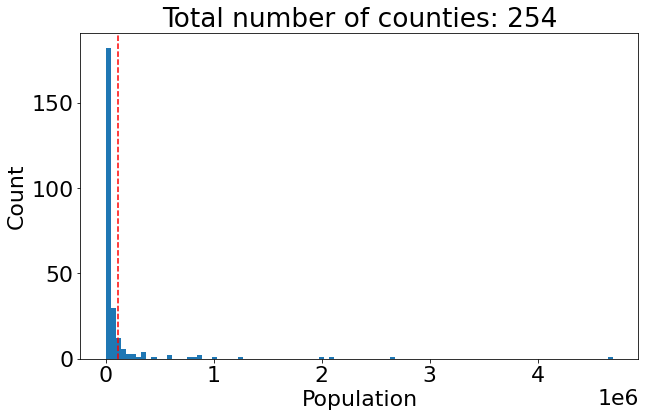

In [11]:
plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 22})
plt.hist(dfTX["POP_ESTIMATE_2018"],bins=100)
plt.title("Total number of counties: {}".format(len(dfTX["POP_ESTIMATE_2018"])))
plt.axvline(np.mean(dfTX["POP_ESTIMATE_2018"]),c="r",linestyle="--")
plt.xlabel("Population")
plt.ylabel("Count");

The average population of a county

In [12]:
np.mean(dfTX["POP_ESTIMATE_2018"])

112999.38976377953

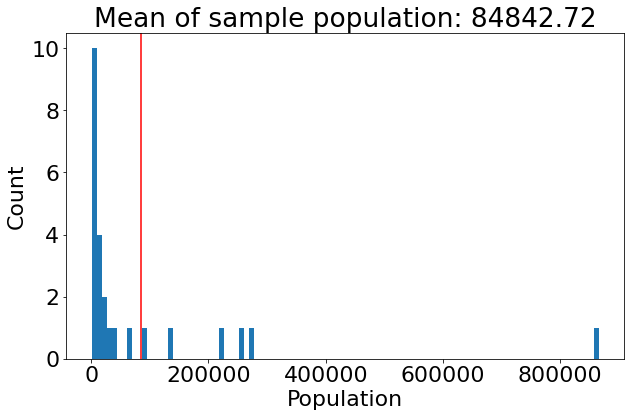

In [13]:
random.seed(2020)
plt.figure(figsize=(10,6))
sample = random.sample(dfTX["POP_ESTIMATE_2018"].to_list(),25)
plt.hist(sample,bins=100)
plt.axvline(np.mean(sample),c="r")
plt.title("Mean of sample population: {}".format(np.mean(sample)))
plt.xlabel("Population")
plt.ylabel("Count");

Distribution of sample mean

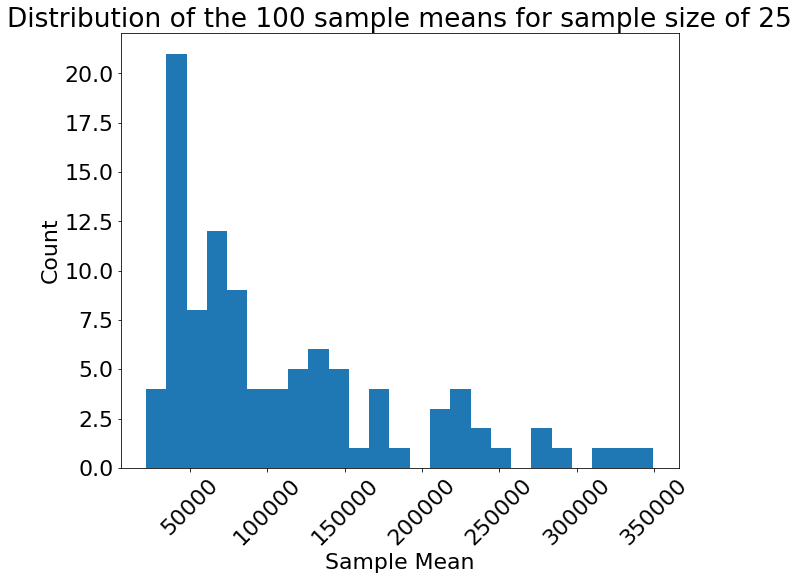

In [14]:
numSample = 25
trials = 100
random.seed(2020)
sampleMeans = []
for i in range(trials):
    sample = random.sample(dfTX["POP_ESTIMATE_2018"].to_list(),numSample)
    sampleMeans.append(np.mean(sample))
plt.figure(figsize=(10,8))
plt.hist(sampleMeans,bins=25)
plt.title("Distribution of the {} sample means for sample size of {}".format(trials, numSample))
plt.gca().xaxis.set_tick_params(rotation=45)
plt.xlabel("Sample Mean")
plt.ylabel("Count");

Change of sample size

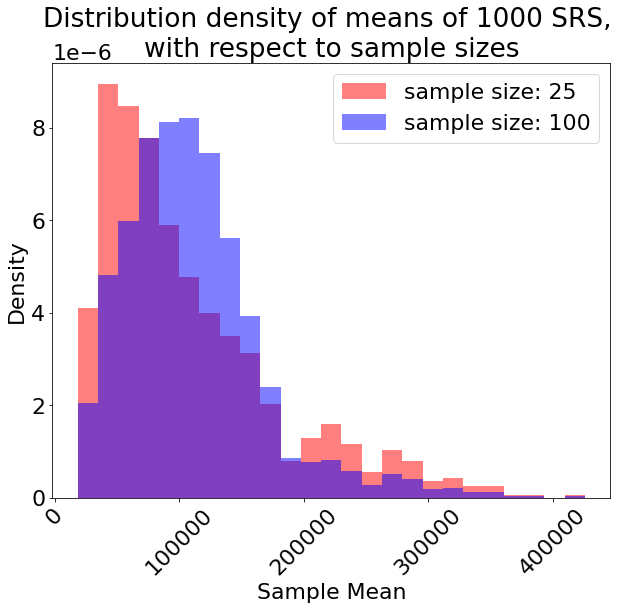

In [15]:
numSamples = [25,100]
colors = ["r","b"]
trials = 1000
random.seed(2020)
plt.figure(figsize=(10,8))
sampleMeans = []
for j in range(len(numSamples)):
    for i in range(trials):
        sample = random.sample(dfTX["POP_ESTIMATE_2018"].to_list(),numSamples[j])
        sampleMeans.append(np.mean(sample))
    plt.hist(sampleMeans,color=colors[j],alpha=0.5,bins=25,label="sample size: {}".format(numSamples[j]),density=True)
plt.legend()
plt.gca().xaxis.set_tick_params(rotation=45)
plt.title("Distribution density of means of 1000 SRS, \nwith respect to sample sizes")
plt.xlabel("Sample Mean")
plt.ylabel("Density");

Change of trials

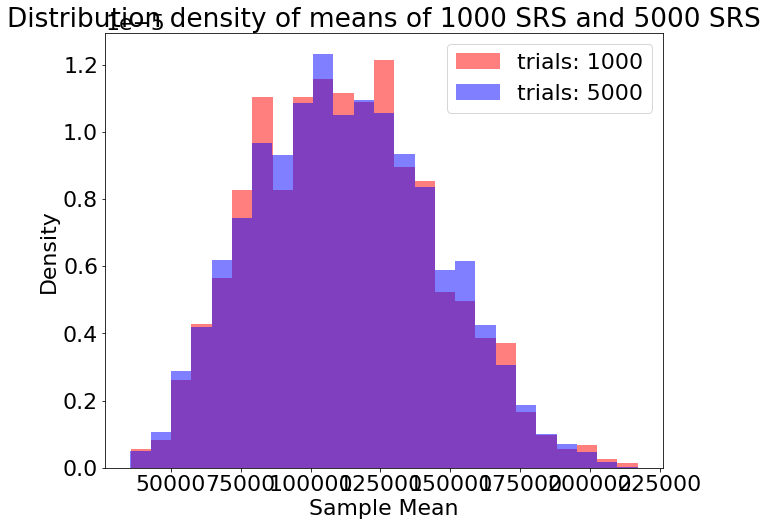

In [16]:
numSample = 100
colors = ["r","b"]
trials = [1000,5000]
random.seed(2020)
plt.figure(figsize=(10,8))
sampleMeans = []
for j in range(len(trials)):
    for i in range(trials[j]):
        sample = random.sample(dfTX["POP_ESTIMATE_2018"].to_list(),numSample)
        sampleMeans.append(np.mean(sample))
    plt.hist(sampleMeans,color=colors[j],alpha=0.5,bins=25,label="trials: {}".format(trials[j]),density=True)
plt.legend();
plt.title("Distribution density of means of 1000 SRS and 5000 SRS")
plt.xlabel("Sample Mean")
plt.ylabel("Density");

## Stratified random sampling

In [17]:
from collections import Counter
Counter(dfTX["Rural-urban_Continuum Code_2013"])

Counter({7.0: 39,
         6.0: 65,
         5.0: 6,
         2.0: 25,
         3.0: 22,
         1.0: 35,
         8.0: 20,
         9.0: 29,
         4.0: 13})

In [18]:
random.seed(2020)
sampleMeans = []
trial = 1
samples = []
for i in range(trial):
    for level in sorted(np.unique(dfTX["Rural-urban_Continuum Code_2013"])):
        samples += random.sample(dfTX[dfTX["Rural-urban_Continuum Code_2013"]==level]["POP_ESTIMATE_2018"].to_list(),4)
    sampleMeans.append(np.mean(samples))

In [19]:
sampleMeans

[144010.47222222222]

In [20]:
random.seed(2020)
sampleMeans = []
trial = 1000
samples = []
for i in range(trial):
    for level in sorted(np.unique(dfTX["Rural-urban_Continuum Code_2013"])):
        samples += random.sample(dfTX[dfTX["Rural-urban_Continuum Code_2013"]==level]["POP_ESTIMATE_2018"].to_list(),4)
    sampleMeans.append(np.mean(samples))

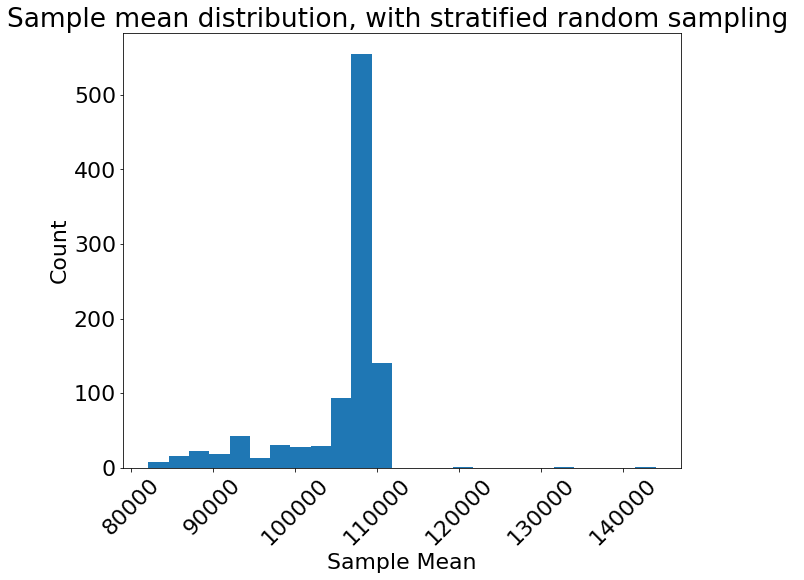

In [21]:
plt.figure(figsize=(10,8))
plt.hist(sampleMeans,bins=25);
plt.title("Sample mean distribution, with stratified random sampling ")
plt.gca().xaxis.set_tick_params(rotation=45)
plt.xlabel("Sample Mean")
plt.ylabel("Count");

check the mean of each group

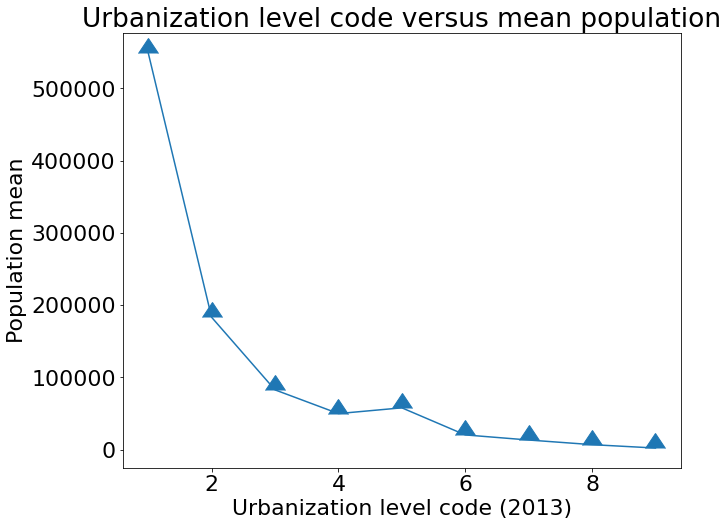

In [22]:
plt.figure(figsize=(10,8))
levels = []
codeMeans = []
for level in sorted(np.unique(dfTX["Rural-urban_Continuum Code_2013"])):
    codeMean = np.mean(dfTX[dfTX["Rural-urban_Continuum Code_2013"]==level]["POP_ESTIMATE_2018"])
    levels.append(level)
    codeMeans.append(codeMean)
plt.plot(levels,codeMeans,marker=10,markersize=20)
plt.title("Urbanization level code versus mean population")
plt.xlabel("Urbanization level code (2013)")
plt.ylabel("Population mean");

Systematic random sampling

In [23]:
random.seed(2020)
idx = random.randint(0,10)
populations = dfTX["POP_ESTIMATE_2018"].to_list()
samples = []
samples.append(populations[idx])
while idx + 10 < len(populations):
    idx += 10
    samples.append(populations[idx])
print(np.mean(samples))

158799.64


## Sampling distribution of statistics

#### Theoretical mean and standard deviation

In [24]:
print(np.mean([i for i in range(1,11)]))
print(np.sqrt(np.mean([(i-5.5)**2 for i in range(1,11)])))

5.5
2.8722813232690143


#### Sampling distribution of the sample mean

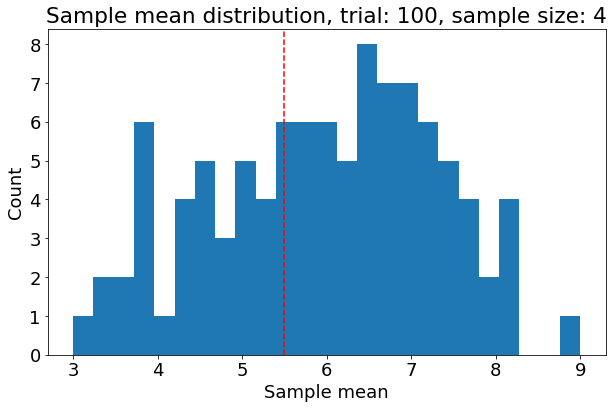

In [25]:
trials = 100
sampleSize = 4
random.seed(2020)
sampleMeans = []
candidates = [i for i in range(1,11)]
plt.rcParams.update({'font.size': 18})
for i in range(trials):
    sampleMean = np.mean([random.choice(candidates) for _ in range(sampleSize)])
    sampleMeans.append(sampleMean)
plt.figure(figsize=(10,6))
plt.hist(sampleMeans, bins=25);
plt.axvline(5.5,c="r", linestyle="--")
plt.title("Sample mean distribution, trial: {}, sample size: {}".format(trials, sampleSize))
plt.xlabel("Sample mean")
plt.ylabel("Count");

In [26]:
np.mean(sampleMeans)

5.9575

#### Increase the number of samples

trials: 400, mean: 5.64, std: 1.4078218992472025
trials: 1600, mean: 5.53390625, std: 1.4563112832464553
trials: 6400, mean: 5.4877734375, std: 1.4309896472527093
trials: 10000, mean: 5.51135, std: 1.4457899838842432


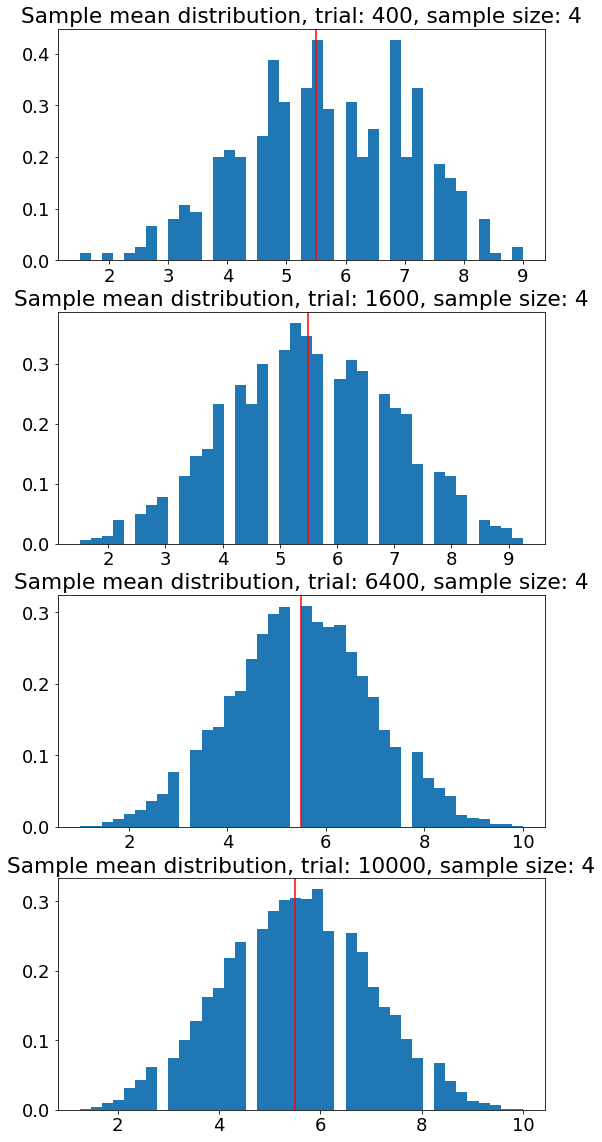

In [32]:
def obtainSampleMeans(trials = 100, sampleSize = 4):
    sampleMeans = []
    candidates = [i for i in range(1,11)]
    for i in range(trials):
        sampleMean = np.mean([random.choice(candidates) for _ in range(sampleSize)])
        sampleMeans.append(sampleMean)
    return sampleMeans

random.seed(2020)
figure, axes = plt.subplots(4,1,figsize=(8,16))
figure.tight_layout()
times = [4,16,64,100]
for i in range(len(times)):
    sampleMeans = obtainSampleMeans(100*times[i],4)
    axes[i].hist(sampleMeans,bins=40,density= True);
    axes[i].axvline(5.5,c="r")
    axes[i].set_title("Sample mean distribution, trial: {}, sample size: {}".format(100*times[i], 4));
    print("trials: {}, mean: {}, std: {}".format(times[i]*100, np.mean(sampleMeans),np.std(sampleMeans)))

#### Increase sample sizes

mean: 5.521953125, std: 2.008562358455105
mean: 5.498046875, std: 1.4431059486582176
mean: 5.5065625, std: 1.026083602146409
mean: 5.4973046875, std: 0.722252039615
mean: 5.49095703125, std: 0.5078149154840389
mean: 5.4991259765625, std: 0.3672720550902535
mean: 5.503431396484375, std: 0.25349930497350254
mean: 5.501925659179688, std: 0.1785229416136657


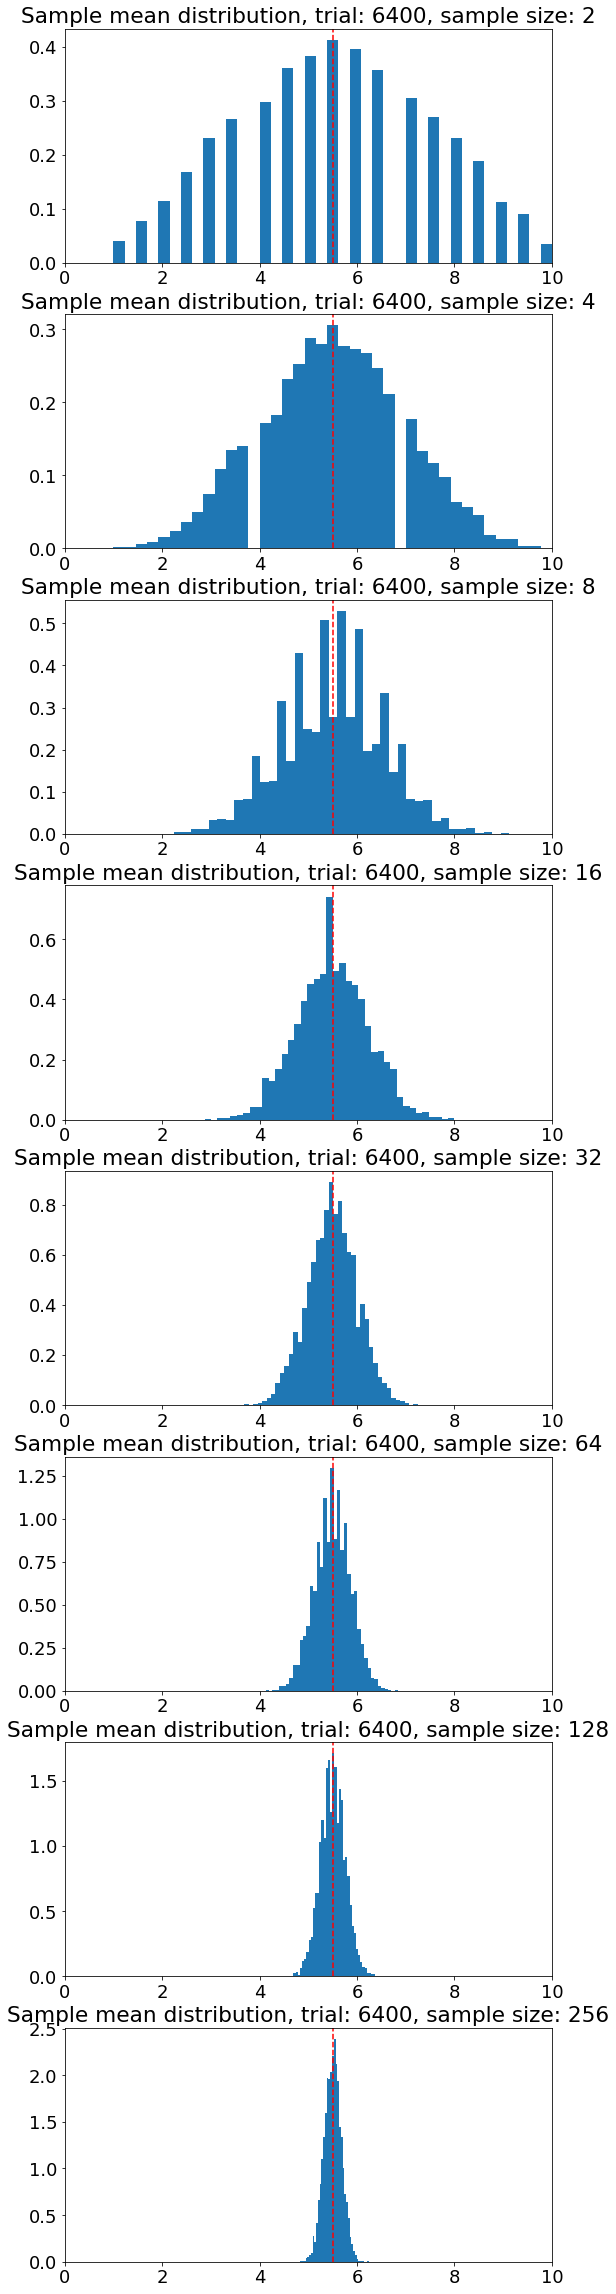

In [28]:
random.seed(2020)
sizes = [2**k for k in range(1,9)]
figure, axes = plt.subplots(8,1,figsize=(8,4*8))
figure.tight_layout()
for i in range(len(sizes)):
    sampleMeans = obtainSampleMeans(6400,sizes[i])
    axes[i].hist(sampleMeans,bins=np.linspace(np.min(sampleMeans),np.max(sampleMeans),40),density= True);
    axes[i].axvline(5.5,c="r", linestyle="--")
    axes[i].set_title("Sample mean distribution, trial: {}, sample size: {}".format(6400, sizes[i]));
    axes[i].set_xlim(0,10)
    print("mean: {}, std: {}".format(np.mean(sampleMeans),np.std(sampleMeans)))

#### Standard error of the sample mean

In [29]:
random.seed(2020)
sizes = [2**k for k in range(1,9)]
ses = []
for i in range(len(sizes)):
    sampleMeans = obtainSampleMeans(6400,sizes[i])
    ses.append(np.std(sampleMeans))

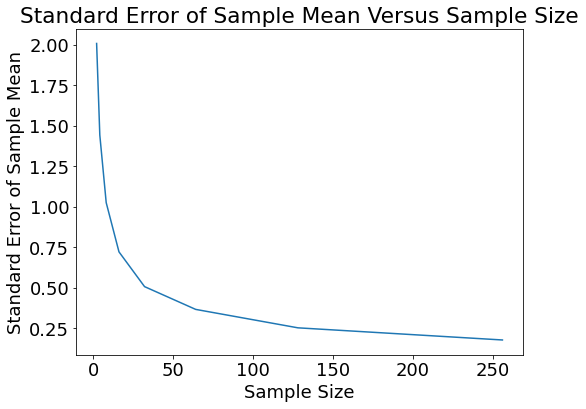

In [30]:
plt.figure(figsize=(8,6))
plt.plot(sizes,ses)
plt.title("Standard Error of Sample Mean Versus Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Standard Error of Sample Mean");

#### Transform the Scales

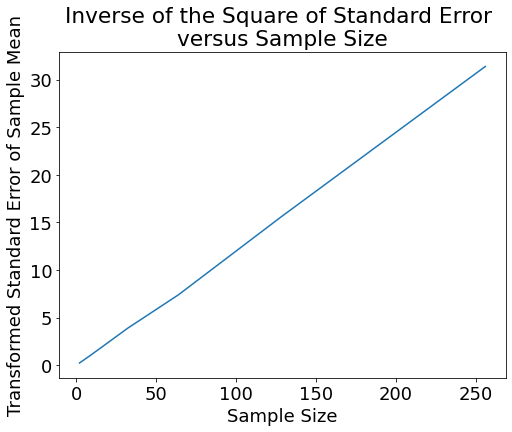

In [31]:
plt.figure(figsize=(8,6))
plt.plot(sizes,[1/ele**2 for ele in ses])
plt.title("Inverse of the Square of Standard Error \nversus Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("Transformed Standard Error of Sample Mean");

## Central limit theorem